<a href="https://colab.research.google.com/github/Kamiilykam/pandas-challenge/blob/master/Oligo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages


In [ ]:
pip install biopython

In [96]:
import pandas as pd

In [65]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp

In [66]:
def read_mrna_sequence(file_path):
    with open(file_path, 'r') as file:
        return Seq(file.read().strip())

In [67]:
def generate_antisense_oligos(mrna_sequence):
    antisense_oligos = [mrna_sequence.reverse_complement()[i:i+20] for i in range(len(mrna_sequence) - 19)]
    return antisense_oligos

In [68]:
def calculate_minimum_free_energy(oligo):
    return MeltingTemp.Tm_Wallace(oligo)

In [69]:
def calculate_gc_content(oligo):
    return Seq(str(oligo)).count("G") + Seq(str(oligo)).count("C")

In [ ]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp

def read_mrna_sequence(file_path):
    with open(file_path, 'r') as file:
        return Seq(file.read().strip())

def generate_antisense_oligos(mrna_sequence):
    antisense_oligos = [mrna_sequence.reverse_complement()[i:i+20] for i in range(len(mrna_sequence) - 19)]
    return antisense_oligos

def calculate_minimum_free_energy(oligo):
    return MeltingTemp.Tm_Wallace(str(oligo))

def calculate_gc_content(oligo):
    return Seq(str(oligo)).count("G") + Seq(str(oligo)).count("C")

def main():
    # Replace 'your_mrna_sequence.txt' with the actual file path containing mRNA sequence
    mrna_sequence_file = '/content/NC_000011.10[62880098..62889656].fa.txt'

    mrna_sequence = read_mrna_sequence(mrna_sequence_file)
    antisense_oligos = generate_antisense_oligos(mrna_sequence)

    alignments_data = []

    for oligo in antisense_oligos:
        min_free_energy = calculate_minimum_free_energy(oligo)
        gc_content = calculate_gc_content(oligo)
        alignments_data.append((oligo, min_free_energy, gc_content))

    # Sort alignments by minimum free energy
    alignments_data.sort(key=lambda x: x[1])

  # Print the chart
    print("Oligo\t\tMinimum Free Energy\tGC Content")
    for oligo, min_free_energy, gc_content in alignments_data:
        print(f"{oligo}\t{min_free_energy:.2f}°C\t{gc_content}%")

if __name__ == "__main__":
    main()

In [103]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp

def read_mrna_sequence(file_path):
    with open(file_path, 'r') as file:
        return Seq(file.read().strip())

def generate_antisense_oligos(mrna_sequence):
    antisense_oligos = [mrna_sequence.reverse_complement()[i:i+20] for i in range(len(mrna_sequence) - 19)]
    return antisense_oligos

def calculate_minimum_free_energy(oligo, temperature):
    # Calculate minimum free energy from melting temperature
    delta_g = -MeltingTemp.Tm_Wallace(str(oligo)) * (1.987 / 1000) * (temperature + 273.15) * 1.0 / 1000
    return delta_g

def calculate_gc_content(oligo):
    return Seq(str(oligo)).count("G") + Seq(str(oligo)).count("C")

def main():
    # Replace 'your_mrna_sequence.txt' with the actual file path containing mRNA sequence
    mrna_sequence_file = '/content/NC_000011.10[62880098..62889656].fa.txt'
    temperature = 37  # Set the temperature in Celsius

    mrna_sequence = read_mrna_sequence(mrna_sequence_file)
    antisense_oligos = generate_antisense_oligos(mrna_sequence)

    alignments_data = []

    for oligo in antisense_oligos:
        delta_g = calculate_minimum_free_energy(oligo, temperature)
        gc_content = calculate_gc_content(oligo)
        alignments_data.append((oligo, delta_g, gc_content))

    # Sort alignments by minimum free energy
    alignments_data.sort(key=lambda x: x[1])

    # Print the chart of top 10 oligos with lowest minimum free energy
    print("Top 10 Oligos with Lowest Minimum Free Energy:")
    print("Oligo\t\tMinimum Free Energy\tGC Content")
    for i, (oligo, delta_g, gc_content) in enumerate(alignments_data[:10], 1):
        print(f"{i}. {oligo}\t{delta_g:.2f} kcal/mol\t{gc_content}%")

if __name__ == "__main__":
    main()


Top 10 Oligos with Lowest Minimum Free Energy:
Oligo		Minimum Free Energy	GC Content
1. GCCCCGCCCCGGCCCGCCCC	-0.05 kcal/mol	20%
2. GCGGAGCCCCGCCCCGGCCC	-0.05 kcal/mol	19%
3. CGGAGCCCCGCCCCGGCCCG	-0.05 kcal/mol	19%
4. GGAGCCCCGCCCCGGCCCGC	-0.05 kcal/mol	19%
5. GAGCCCCGCCCCGGCCCGCC	-0.05 kcal/mol	19%
6. AGCCCCGCCCCGGCCCGCCC	-0.05 kcal/mol	19%
7. CCCCGCCCCGGCCCGCCCCT	-0.05 kcal/mol	19%
8. CCCGGGACGGGGGCGCGCTG	-0.05 kcal/mol	18%
9. CCGGGACGGGGGCGCGCTGC	-0.05 kcal/mol	18%
10. GCCGCGGCTGCCGCCTCCGC	-0.05 kcal/mol	18%


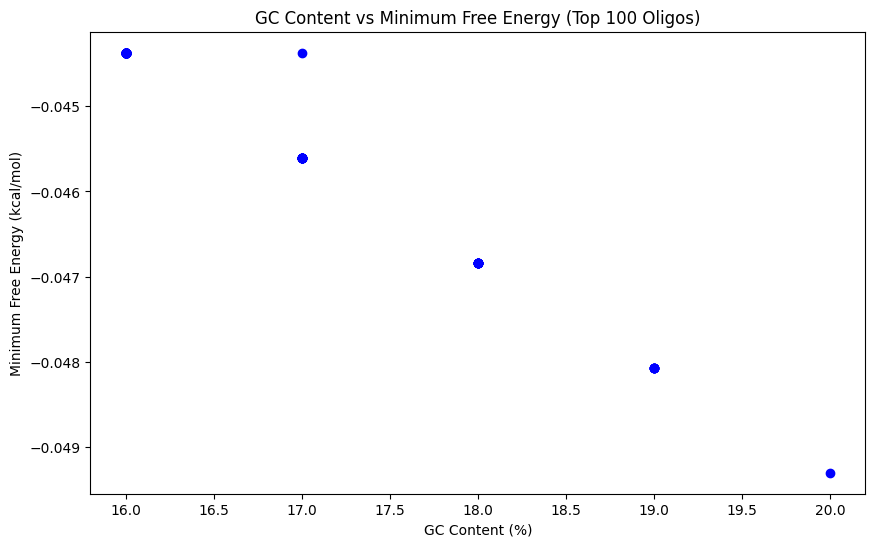

In [109]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp
import matplotlib.pyplot as plt

def read_mrna_sequence(file_path):
    with open(file_path, 'r') as file:
        return Seq(file.read().strip())

def generate_antisense_oligos(mrna_sequence):
    antisense_oligos = [mrna_sequence.reverse_complement()[i:i+20] for i in range(len(mrna_sequence) - 19)]
    return antisense_oligos

def calculate_minimum_free_energy(oligo, temperature):
    delta_g = -MeltingTemp.Tm_Wallace(str(oligo)) * (1.987 / 1000) * (temperature + 273.15) * 1.0 / 1000
    return delta_g

def calculate_gc_content(oligo):
    return Seq(str(oligo)).count("G") + Seq(str(oligo)).count("C")

def main():
    mrna_sequence_file = '/content/NC_000011.10[62880098..62889656].fa.txt'
    temperature = 37

    mrna_sequence = read_mrna_sequence(mrna_sequence_file)
    antisense_oligos = generate_antisense_oligos(mrna_sequence)

    alignments_data = []

    for oligo in antisense_oligos:
        delta_g = calculate_minimum_free_energy(oligo, temperature)
        gc_content = calculate_gc_content(oligo)
        alignments_data.append((oligo, delta_g, gc_content))

    # Sort alignments by minimum free energy
    alignments_data.sort(key=lambda x: x[1])

    # Plot the graph for top 100 oligos
    gc_contents = [gc_content for _, _, gc_content in alignments_data[:100]]
    delta_gs = [delta_g for _, delta_g, _ in alignments_data[:100]]

    plt.figure(figsize=(10, 6))
    plt.scatter(gc_contents, delta_gs, color='blue', marker='o')
    plt.title('GC Content vs Minimum Free Energy (Top 100 Oligos)')
    plt.xlabel('GC Content (%)')
    plt.ylabel('Minimum Free Energy (kcal/mol)')

    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp
import csv
import matplotlib.pyplot as plt

def read_mrna_sequence(file_path):
    with open(file_path, 'r') as file:
        return Seq(file.read().strip())

def generate_antisense_oligos(mrna_sequence):
    antisense_oligos = [mrna_sequence.reverse_complement()[i:i+20] for i in range(len(mrna_sequence) - 19)]
    return antisense_oligos

def calculate_minimum_free_energy(oligo, temperature):
    delta_g = -MeltingTemp.Tm_Wallace(str(oligo)) * (1.987 / 1000) * (temperature + 273.15) * 1.0 / 1000
    return delta_g

def calculate_gc_content(oligo):
    return Seq(str(oligo)).count("G") + Seq(str(oligo)).count("C")

def write_to_csv(data, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Oligo', 'Minimum Free Energy (kcal/mol)', 'GC Content (%)'])
        writer.writerows(data)

def main():
    mrna_sequence_file = '/content/NC_000011.10[62880098..62889656].fa.txt'
    temperature = 37

    mrna_sequence = read_mrna_sequence(mrna_sequence_file)
    antisense_oligos = generate_antisense_oligos(mrna_sequence)

    alignments_data = []

    for oligo in antisense_oligos:
        delta_g = calculate_minimum_free_energy(oligo, temperature)
        gc_content = calculate_gc_content(oligo)
        alignments_data.append((str(oligo), delta_g, gc_content))

    # Sort alignments by minimum free energy
    alignments_data.sort(key=lambda x: x[1])

    # Write data to CSV file
    csv_filename = 'oligo_data.csv'
    write_to_csv(alignments_data, csv_filename)
    print(f'Data written to {csv_filename}')

    # Plot the graph
    gc_contents = [gc_content for _, _, gc_content in alignments_data[:10]]
    delta_gs = [delta_g for _, delta_g, _ in alignments_data[:10]]

    plt.figure(figsize=(10, 6))
    plt.scatter(gc_contents, delta_gs, color='blue', marker='o')
    plt.title('GC Content vs Minimum Free Energy')
    plt.xlabel('GC Content (%)')
    plt.ylabel('Minimum Free Energy (kcal/mol)')

    # Annotate the points with the corresponding oligo index
    for i, (oligo, _, _) in enumerate(alignments_data[:10]):
        plt.annotate(f'{i + 1}.', (gc_contents[i], delta_gs[i]))

    plt.show()

if __name__ == "__main__":
    main()


Data written to oligo_data.csv

Statistical Summary:
       Minimum Free Energy (kcal/mol)  GC Content (%)
count                     9676.000000     9676.000000
mean                        -0.036776       10.118954
std                          0.003563        2.809767
min                         -0.049301        0.000000
25%                         -0.039441        8.000000
50%                         -0.036976       10.000000
75%                         -0.034511       12.000000
max                         -0.024651       20.000000


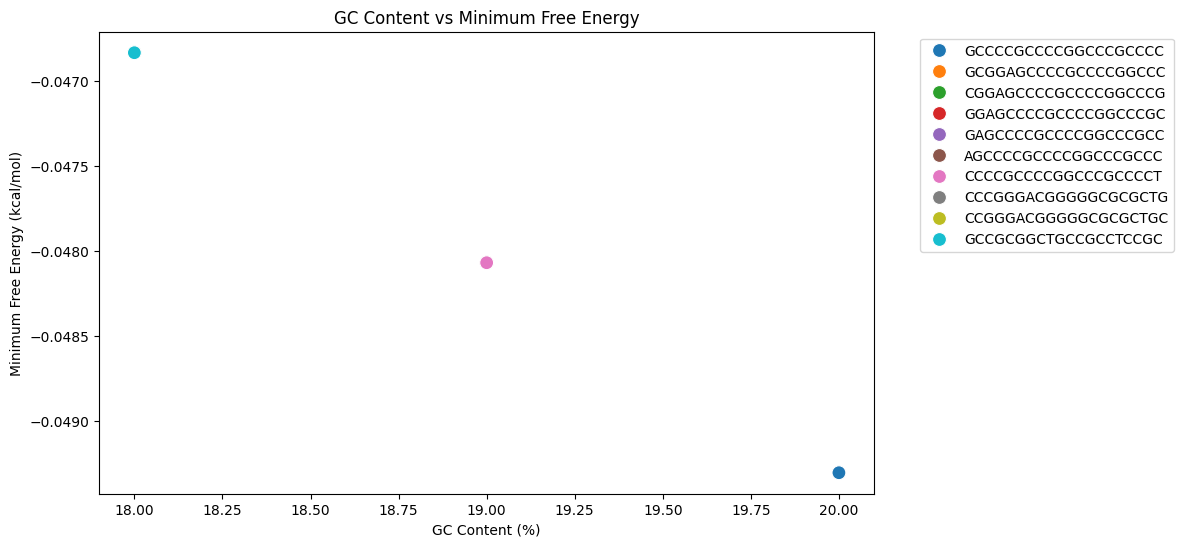

In [117]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def read_mrna_sequence(file_path):
    with open(file_path, 'r') as file:
        return Seq(file.read().strip())

def generate_antisense_oligos(mrna_sequence):
    antisense_oligos = [mrna_sequence.reverse_complement()[i:i+20] for i in range(len(mrna_sequence) - 19)]
    return antisense_oligos

def calculate_minimum_free_energy(oligo, temperature):
    delta_g = -MeltingTemp.Tm_Wallace(str(oligo)) * (1.987 / 1000) * (temperature + 273.15) * 1.0 / 1000
    return delta_g

def calculate_gc_content(oligo):
    return Seq(str(oligo)).count("G") + Seq(str(oligo)).count("C")

def write_to_csv(data, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Oligo', 'Minimum Free Energy (kcal/mol)', 'GC Content (%)'])
        writer.writerows(data)

def main():
    mrna_sequence_file = '/content/NC_000011.10[62880098..62889656].fa.txt'
    temperature = 37

    mrna_sequence = read_mrna_sequence(mrna_sequence_file)
    antisense_oligos = generate_antisense_oligos(mrna_sequence)

    alignments_data = []

    for oligo in antisense_oligos:
        delta_g = calculate_minimum_free_energy(oligo, temperature)
        gc_content = calculate_gc_content(oligo)
        alignments_data.append((str(oligo), delta_g, gc_content))

    # Sort alignments by minimum free energy
    alignments_data.sort(key=lambda x: x[1])

    # Write data to CSV file
    csv_filename = 'oligo_data.csv'
    write_to_csv(alignments_data, csv_filename)
    print(f'Data written to {csv_filename}')

    # Load data into a pandas DataFrame
    df = pd.DataFrame(alignments_data, columns=['Oligo', 'Minimum Free Energy (kcal/mol)', 'GC Content (%)'])

    # Perform statistical analysis
    statistical_summary = df.describe()

    # Print statistical summary
    print("\nStatistical Summary:")
    print(statistical_summary)

    # Plot the graph
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df.head(10), x='GC Content (%)', y='Minimum Free Energy (kcal/mol)', hue='Oligo', s=100)
    plt.title('GC Content vs Minimum Free Energy')
    plt.xlabel('GC Content (%)')
    plt.ylabel('Minimum Free Energy (kcal/mol)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

if __name__ == "__main__":
    main()


Data written to oligo_data.csv


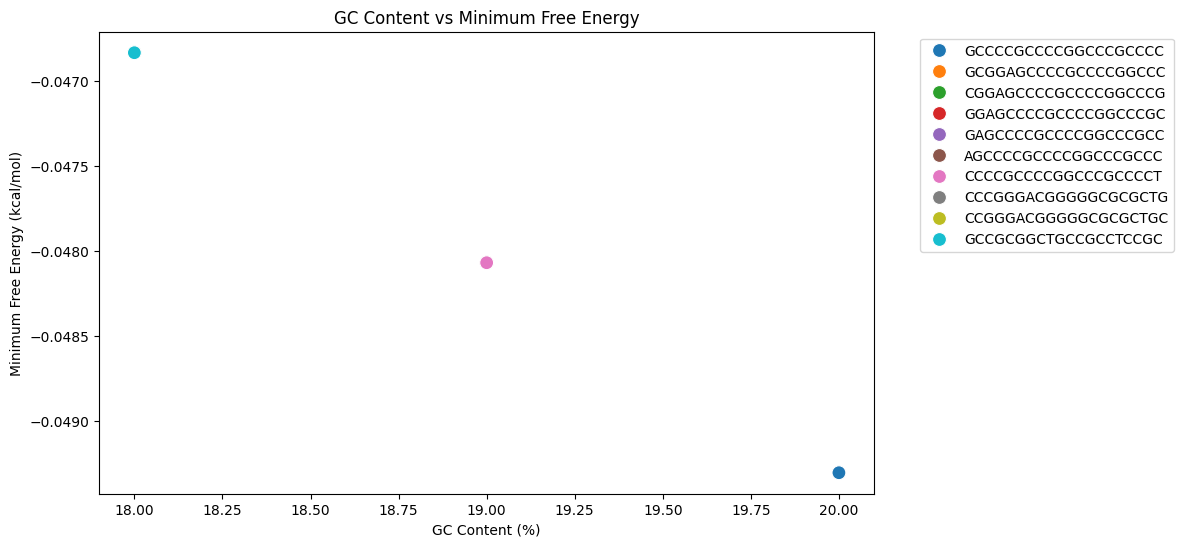

In [123]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

def read_mrna_sequence(file_path):
    with open(file_path, 'r') as file:
        return Seq(file.read().strip())

def generate_antisense_oligos(mrna_sequence):
    antisense_oligos = [mrna_sequence.reverse_complement()[i:i+20] for i in range(len(mrna_sequence) - 19)]
    return antisense_oligos

def calculate_minimum_free_energy(oligo, temperature):
    delta_g = -MeltingTemp.Tm_Wallace(str(oligo)) * (1.987 / 1000) * (temperature + 273.15) * 1.0 / 1000
    return delta_g

def calculate_gc_content(oligo):
    return Seq(str(oligo)).count("G") + Seq(str(oligo)).count("C")

def write_to_csv(data, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Oligo', 'Minimum Free Energy (kcal/mol)', 'GC Content (%)'])
        writer.writerows(data)

def main():
    mrna_sequence_file = '/content/NC_000011.10[62880098..62889656].fa.txt'
    temperature = 37

    mrna_sequence = read_mrna_sequence(mrna_sequence_file)
    antisense_oligos = generate_antisense_oligos(mrna_sequence)

    alignments_data = []

    for oligo in antisense_oligos:
        delta_g = calculate_minimum_free_energy(oligo, temperature)
        gc_content = calculate_gc_content(oligo)
        alignments_data.append((str(oligo), delta_g, gc_content))

    # Sort alignments by minimum free energy
    alignments_data.sort(key=lambda x: x[1])

    # Write data to CSV file
    csv_filename = 'oligo_data.csv'
    write_to_csv(alignments_data, csv_filename)
    print(f'Data written to {csv_filename}')

    # Load data into a pandas DataFrame
    df = pd.DataFrame(alignments_data, columns=['Oligo', 'Minimum Free Energy (kcal/mol)', 'GC Content (%)'])


    # Plot the graph
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df.head(10), x='GC Content (%)', y='Minimum Free Energy (kcal/mol)', hue='Oligo', s=100)
    plt.title('GC Content vs Minimum Free Energy')
    plt.xlabel('GC Content (%)')
    plt.ylabel('Minimum Free Energy (kcal/mol)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

if __name__ == "__main__":
    main()


In [127]:
def main():
    mrna_sequence_file = '/content/NC_000011.10[62880098..62889656].fa.txt'
    temperature = 37

    mrna_sequence = read_mrna_sequence(mrna_sequence_file)
    antisense_oligos = generate_antisense_oligos(mrna_sequence)

    alignments_data = []

    for oligo in antisense_oligos:
        delta_g = calculate_minimum_free_energy(oligo, temperature)
        gc_content = calculate_gc_content(oligo)
        alignments_data.append((str(oligo), delta_g, gc_content))

    # Sort alignments by minimum free energy
    alignments_data.sort(key=lambda x: x[1])

    # Write data to CSV file
    csv_filename = 'oligo_data.csv'
    write_to_csv(alignments_data, csv_filename)
    print(f'Data written to {csv_filename}')

    # Load data into a pandas DataFrame
    df = pd.DataFrame(alignments_data, columns=['Oligo', 'Minimum Free Energy (kcal/mol)', 'GC Content (%)'])


In [131]:
!pip install stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24283 sha256=f83592abeabe8ce667c7ce4fbbcef475d3fae32a56f24903c452b89fa3875a0b
  Stored in directory: /root/.cache/pip/wheels/c9/85/bc/3371b9bce1e4f7b8b638e8c968a4dbd74db171ee180c48f808
Successfully built stats


In [133]:
!pip install scipy

In [113]:
csv_filename = "C:/Users/musty/Downloads/oligo_data.csv"

In [146]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp
import csv
import pandas as pd
import scipy.stats as stats

def read_mrna_sequence(file_path):
    with open(file_path, 'r') as file:
        return Seq(file.read().strip())

def generate_antisense_oligos(mrna_sequence):
    antisense_oligos = [mrna_sequence.reverse_complement()[i:i+20] for i in range(len(mrna_sequence) - 19)]
    return antisense_oligos

def calculate_minimum_free_energy(oligo, temperature):
    delta_g = -MeltingTemp.Tm_Wallace(str(oligo)) * (1.987 / 1000) * (temperature + 273.15) * 1.0 / 1000
    return delta_g

def calculate_gc_content(oligo):
    return Seq(str(oligo)).count("G") + Seq(str(oligo)).count("C")

def write_to_csv(data, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Oligo', 'Minimum Free Energy (kcal/mol)', 'GC Content (%)'])
        writer.writerows(data)

def main():
    mrna_sequence_file = '/content/NC_000011.10[62880098..62889656].fa.txt'
    temperature = 37

    mrna_sequence = read_mrna_sequence(mrna_sequence_file)
    antisense_oligos = generate_antisense_oligos(mrna_sequence)

    alignments_data = []

    for oligo in antisense_oligos:
        delta_g = calculate_minimum_free_energy(oligo, temperature)
        gc_content = calculate_gc_content(oligo)
        alignments_data.append((str(oligo), delta_g, gc_content))

    # Sort alignments by minimum free energy
    alignments_data.sort(key=lambda x: x[1])

    # Write data to CSV file
    csv_filename = 'oligo_data.csv'
    write_to_csv(alignments_data, csv_filename)
    print(f'Data written to {csv_filename}')

    # Load data into a pandas DataFrame
    df = pd.DataFrame(alignments_data, columns=['Oligo', 'Minimum Free Energy (kcal/mol)', 'GC Content (%)'])

    # Perform a t-test as an example
    group1 = df.head(1000)['Minimum Free Energy (kcal/mol)']
    group2 = df.tail(1000)['Minimum Free Energy (kcal/mol)']

    t_stat, p_value = stats.ttest_ind(group1, group2)

    # Print the t-statistic and p-value
    print(f'\nT-statistic: {t_stat:.4f}')
    print(f'P-value: {p_value:.4f}')

if __name__ == "__main__":
    main()


Data written to oligo_data.csv

T-statistic: -179.1563
P-value: 0.0000
